# Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('survey_results_public.csv')
df.set_index('Respondent', inplace=True)
df

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
Respondent,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Clean Data

In [2]:
df.dropna(how='any', inplace=True)
df

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
Respondent,,,,,,,,,,,,,,,,,,,,,
10,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,GBP,...,Easy,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4
33,I am a developer by profession,Yes,39.0,14,Monthly,4900.0,63564.0,Belgium,European Euro,EUR,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;Gatsby;React.js;Ruby on Rails,Angular;Angular.js;Django;Express;React.js,Just as welcome now as I felt last year,40.0,20,14
42,I am a developer by profession,No,32.0,14,Yearly,130000.0,130000.0,United States,United States dollar,USD,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core;Spring,ASP.NET;Flask;React.js;Spring,Somewhat less welcome now than last year,37.0,16,10
47,I am a developer by profession,Yes,53.0,10,Yearly,58000.0,74970.0,United Kingdom,Pound sterling,GBP,...,Neither easy nor difficult,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43,28
69,I am a developer by profession,Yes,25.0,12,Yearly,550000.0,594539.0,France,European Euro,EUR,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62863,I am a developer by profession,Yes,30.0,11,Yearly,230000.0,230000.0,United States,United States dollar,USD,...,Easy,Appropriate in length,No,"Information systems, information technology, o...",Angular;Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,10,7
62886,I am a developer by profession,Yes,32.0,24,Yearly,102700.0,102700.0,United States,United States dollar,USD,...,Easy,Appropriate in length,No,"Information systems, information technology, o...",Angular,Angular;Angular.js;ASP.NET Core,Somewhat more welcome now than last year,45.0,7,5
62904,I am a developer by profession,Yes,33.0,24,Yearly,95000.0,95000.0,United States,United States dollar,USD,...,Neither easy nor difficult,Too long,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;Laravel;React.js;Vue.js,Just as welcome now as I felt last year,50.0,9,7


# Analytics

### How many developers between the age of 20 and 30 have worked with python?

In [3]:
filt = (df['Age'] > 20.0) & (df['Age'] < 30.0)
under_30 = df[filt]

under_30['LanguageWorkedWith'].str.contains('Python').count()

1806

#### 1806 developers have used Python

### Which country has the highest average salary?

In [4]:
grp_country = df.groupby('Country')
avg_salary = [x for x in df.groupby('Country').mean()['ConvertedComp']]
country = [x for x in df.groupby('Country').mean().index]

Text(0.5, 1.0, 'How does the salary (USD) comapare amongst different countries in the world?')

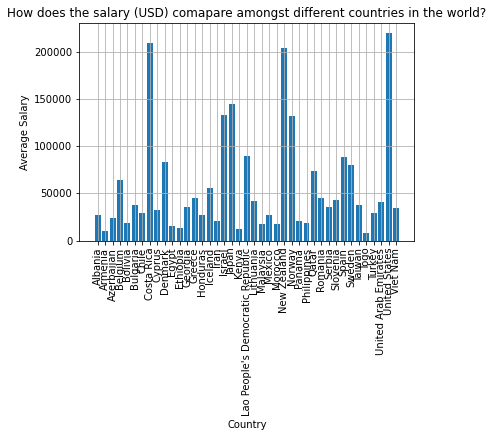

In [5]:
# had to decrease number of countries to show axis properly
plt.bar(country[0:124:3], avg_salary[0:124:3]) 
plt.grid()
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average Salary')
plt.title('How does the salary (USD) comapare amongst different countries in the world?')

#### United States has the highest average salary

### What is the average years of coding experience for an 'Engineering Manager'?

#### First we need to convert the 'YearsCode' column to floats since they are currently in string type. Before we do this we need to replace the 'Less than 1 year' and 'More than 50 years' responses to an actual value so that the float conversion is successful

In [6]:
# 'less than one year' is assumed to be about half a year
df.replace('Less than 1 year', '0.5', inplace=True)
# 'More than 50 years' is assumed to be 50 years
df.replace('More than 50 years', '50', inplace=True)
df['YearsCode'] = df['YearsCode'].astype(float)

In [7]:
dev_type_grp = df.groupby('DevType')
respondent = [str(x) for x in dev_type_grp.get_group('Engineering manager').index]
years = [x for x in dev_type_grp.get_group('Engineering manager')['YearsCode']]

Text(0.5, 1.0, 'Years of coding experience for a developer in an "Engineering Manager" role')

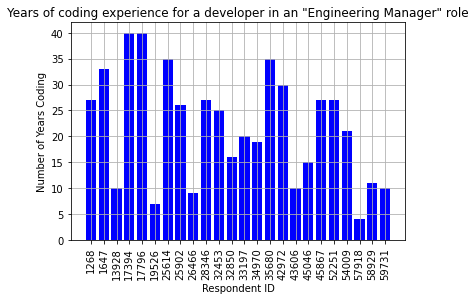

In [22]:
plt.bar(respondent, years, color='blue')
plt.xticks(respondent, rotation=90)
plt.grid()
plt.xlabel('Respondent ID')
plt.ylabel('Number of Years Coding')
plt.title('Years of coding experience for a developer in an "Engineering Manager" role')

In [9]:
dev_type_grp.get_group('Engineering manager')['YearsCode'].mean()

21.833333333333332

#### The average for engineering managers are almost 22 years of coding experience

### How many 'hobbyist' progammers make over $65,000 USD?

In [10]:
df['Hobbyist'] = df['Hobbyist'].map({'Yes': True, 'No': False})
df['ConvertedComp'].astype(float)
df

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
Respondent,,,,,,,,,,,,,,,,,,,,,
10,I am a developer by profession,True,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,GBP,...,Easy,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8.0,4
33,I am a developer by profession,True,39.0,14,Monthly,4900.0,63564.0,Belgium,European Euro,EUR,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;Gatsby;React.js;Ruby on Rails,Angular;Angular.js;Django;Express;React.js,Just as welcome now as I felt last year,40.0,20.0,14
42,I am a developer by profession,False,32.0,14,Yearly,130000.0,130000.0,United States,United States dollar,USD,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core;Spring,ASP.NET;Flask;React.js;Spring,Somewhat less welcome now than last year,37.0,16.0,10
47,I am a developer by profession,True,53.0,10,Yearly,58000.0,74970.0,United Kingdom,Pound sterling,GBP,...,Neither easy nor difficult,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28
69,I am a developer by profession,True,25.0,12,Yearly,550000.0,594539.0,France,European Euro,EUR,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62863,I am a developer by profession,True,30.0,11,Yearly,230000.0,230000.0,United States,United States dollar,USD,...,Easy,Appropriate in length,No,"Information systems, information technology, o...",Angular;Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,10.0,7
62886,I am a developer by profession,True,32.0,24,Yearly,102700.0,102700.0,United States,United States dollar,USD,...,Easy,Appropriate in length,No,"Information systems, information technology, o...",Angular,Angular;Angular.js;ASP.NET Core,Somewhat more welcome now than last year,45.0,7.0,5
62904,I am a developer by profession,True,33.0,24,Yearly,95000.0,95000.0,United States,United States dollar,USD,...,Neither easy nor difficult,Too long,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;Laravel;React.js;Vue.js,Just as welcome now as I felt last year,50.0,9.0,7


In [11]:
filt = (df['Hobbyist'] == True) & (df['ConvertedComp'] > 65000)
df.loc[filt, 'ConvertedComp'].count()

1609

#### 1609 programmers make above $65,000 and code as a hobby

### Which type of developers make the max compensation of $2,000,000?

In [12]:
filt = df['ConvertedComp'] == 2000000

In [23]:
# Only using first ten types and amount of each to fit the graph scale
dev_type = [x for x in df.loc[filt, 'DevType'][:10]]
dev_count = [x for x in df.loc[filt, 'DevType'].value_counts()[:10]]

Text(0.5, 1.0, 'Which developer role makes the maximum compensation?')

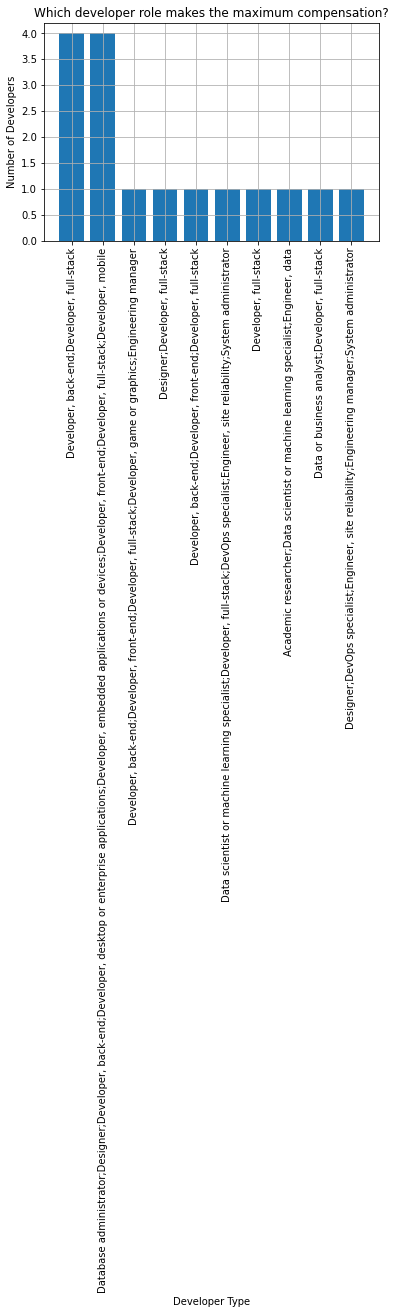

In [20]:
from matplotlib import pyplot as plt

plt.bar(dev_type, dev_count)
plt.xticks(rotation=90)
plt.grid()
plt.xlabel('Developer Type')
plt.ylabel('Number of Developers')
plt.title('Which developer role makes the maximum compensation?')

#### The developers with the highest monetary compensation ($2,000,000) are generally full-stack developers

### Age vs. Salary?

In [15]:
age_grp = df.groupby('Age')
avg_salary = [x for x in age_grp.mean()['ConvertedComp']]
age = [str(x) for x in age_grp.mean().index]

Text(0.5, 1.0, 'How does compensation compare with the age of a developer?')

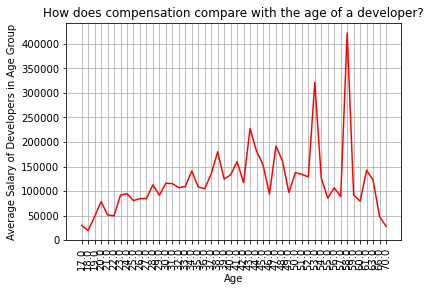

In [16]:
plt.plot(age, avg_salary, color='red')
plt.xticks(rotation=90)
plt.grid()
plt.xlabel('Age')
plt.ylabel('Average Salary of Developers in Age Group')
plt.title('How does compensation compare with the age of a developer?')

#### The overall trend is that compensation increases with age, however after a certain age, the compensation decreases

### Language vs Compensation?

In [17]:
language_grp = df.groupby('LanguageWorkedWith')
avg_language_salary = language_grp.apply(lambda x: x.mean()['ConvertedComp'])

python_avg_salary = avg_language_salary.get('Python')
java_avg_salary = avg_language_salary.get('Java')
js_avg_salary = avg_language_salary.get('JavaScript')
c_avg_salary = avg_language_salary.get('C#')

In [18]:
compensations = [python_avg_salary, java_avg_salary, js_avg_salary, c_avg_salary]
language = ['Python', 'Java', 'Javascript', 'C']

Text(0.5, 1.0, 'How does the programming language have an impact on compensation?')

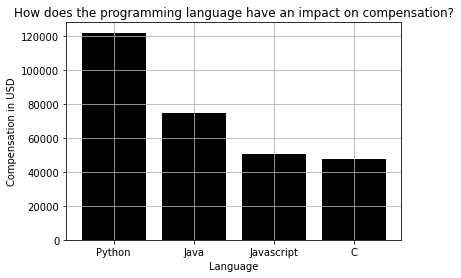

In [19]:
plt.bar(language, compensations, color='black')
plt.grid()
plt.xlabel('Language')
plt.ylabel('Compensation in USD')
plt.title('How does the programming language have an impact on compensation?')

#### It can be concluded that pure python programmers receive greater compensation when comapared to three other languages